In [18]:
import pandas as pd

df=pd.read_csv('fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [20]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data

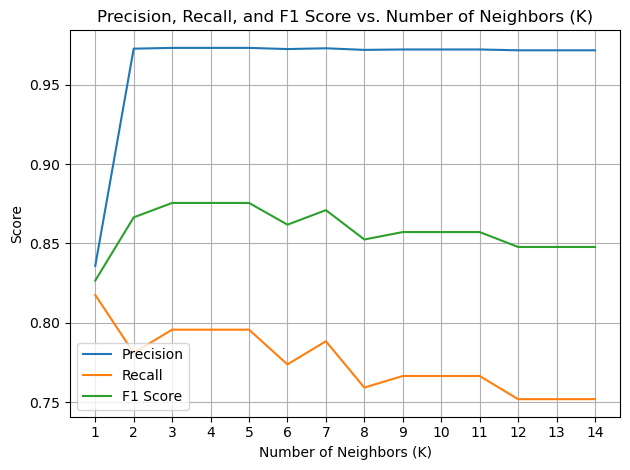

In [34]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

krange=range(1,15)
precision=[]
rec=[]
f1score=[]
for k in krange:
    steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = k))]
    knn_pipeline = Pipeline(steps)
    knn_pipeline.fit(X_train, y_train)
    ypred_test = knn_pipeline.predict(X_test)
    pre = precision_score(y_test, ypred_test)
    recall = recall_score(y_test, ypred_test)
    f1=f1_score(y_test, ypred_test)
    precision.append(pre)
    rec.append(recall)
    f1score.append(f1)
    
plt.plot(krange, precision, label='Precision')
plt.plot(krange, rec, label='Recall')
plt.plot(krange, f1score, label='F1 Score')

plt.title('Precision, Recall, and F1 Score vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.xticks(krange)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()